# 6. 비지도학습

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

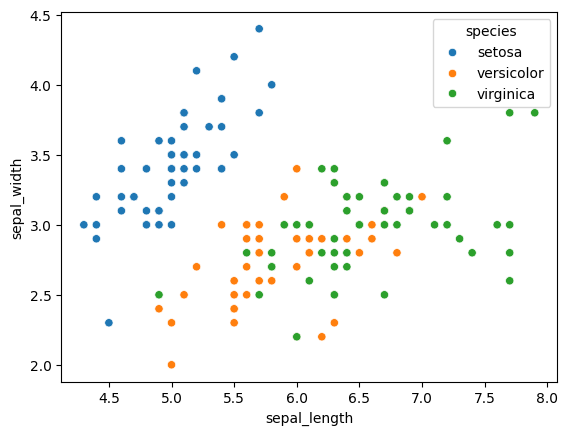

In [4]:
sns.scatterplot(data = iris_df, x='sepal_length', y='sepal_width' , hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

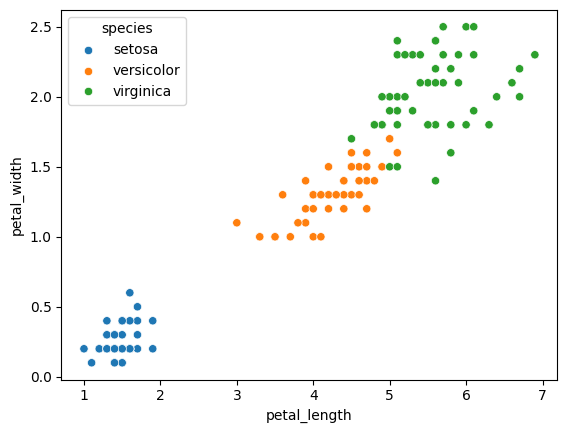

In [5]:
sns.scatterplot(data = iris_df, x='petal_length', y='petal_width' , hue='species')

In [6]:
iris_df2 = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_df2.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


1. 주요 매개변수 설명
n_clusters
- 설명: 군집의 개수를 지정합니다.
- 역할: 데이터를 몇 개의 그룹(클러스터)로 나눌 것인지 결정합니다.
- 기본값: 8
- 주의: 적절한 n_clusters를 선택하려면 사전에 데이터의 특성을 분석하거나, 엘보우 방법(Elbow Method) 같은 평가 방법을 사용할 수 있습니다.

init
- 설명: 클러스터 중심(centroid)을 초기화하는 방법을 지정합니다.
- 선택 가능한 값:
  - 'k-means++' (기본값): 초기 중심을 데이터의 분포에 따라 선택하여 수렴 속도와 결과의 품질을 높입니다.
  - 'random': 랜덤하게 초기 중심을 선택합니다.
  - ndarray: 사용자가 직접 초기 중심 좌표를 지정할 수도 있습니다.
>추천: 일반적으로 'k-means++'가 더 효율적이며, 대부분의 경우 기본값을 사용합니다.

max_iter
- 설명: 알고리즘이 수렴할 때까지 반복할 최대 횟수를 지정합니다.
- 기본값: 300
- 역할: 수렴하지 않더라도 알고리즘을 강제로 종료시키기 위한 제한입니다.
- 설정 팁: 데이터에 따라 값이 너무 작으면 수렴하지 않을 수 있으므로, 기본값을 사용하는 것이 일반적입니다.


2. 추가적으로 중요한 매개변수들
n_init
- 설명: 초기 중심을 설정한 후 전체 알고리즘을 실행하는 횟수를 지정합니다.
- 기본값: 10 (이전 버전에서는 필수 매개변수)
- 역할: 여러 번 실행한 후 최적의 결과(군집화 오차를 최소화하는 결과)를 선택합니다.
- 설정 팁: 기본값으로 충분하지만, 실행 시간이 중요하지 않다면 더 큰 값을 설정하여 안정성을 높일 수 있습니다.


tol
- 설명: 알고리즘의 수렴 기준인 허용 오차를 지정합니다.
- 기본값: 1e-4
- 역할: 클러스터 중심의 이동이 tol보다 작아지면 수렴한 것으로 간주하고 알고리즘을 종료합니다.
- 설정 팁: 매우 큰 값을 설정하면 부정확한 결과를 초래할 수 있습니다.

verbose
- 설명: 학습 과정의 진행 상황을 출력합니다.
- 역할: 학습 디버깅 및 진행 상황 확인에 사용됩니다.
- 기본값: 0 (출력 없음)
- 설정 팁: verbose=1 이상으로 설정하면 학습 과정을 확인할 수 있습니다.



In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3 , init= 'k-means++',max_iter= 300, random_state=42)
kmeans.fit(iris_df2)


KMeans(n_clusters=3, random_state=42)

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [9]:
iris_df2['target'] = iris_df['species']
iris_df2['cluster'] = kmeans.labels_
iris_df2

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


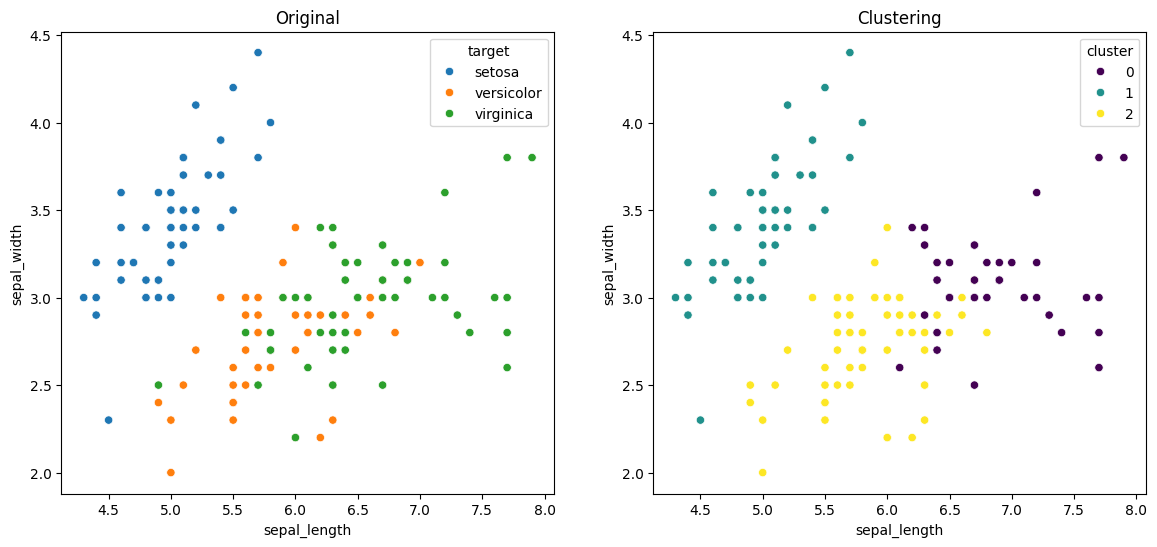

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(data = iris_df2, x = 'sepal_length',y ='sepal_width', hue = 'target')
plt.title("Original")

plt.subplot(1,2,2)
sns.scatterplot(data = iris_df2, x = 'sepal_length',y ='sepal_width', hue = 'cluster',palette="viridis")
plt.title('Clustering')
plt.show()

## 3.3 RFM 고객 세그멘테이션

# 1. Data EDA & Preprocessing

In [91]:
import openpyxl

path = '/Users/jun/GitStudy/Data_4/Data/OnlineRetail/Online Retail.xlsx'

commerce_df = pd.read_excel(path)
commerce_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [92]:
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [93]:
# 주문자가 빠져있는 게 13만개. mapping 할 수 있는 방법이 없기 떄문에 삭제하겠다.
commerce_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [94]:
# 1. 데이터 EDA 및 전처리
commerce_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


freq 값의 이해
- freq 값: 최빈값의 등장 횟수.
- top 값: 가장 많이 등장한 최빈값 그 자체.

freq는 Pandas의 describe(include='all')에서 제공하는 카테고리형 데이터에 대한 빈도 정보를 나타냅니다. 이 값은 최빈값(가장 많이 등장한 값)의 등장 횟수를 보여줍니다.

In [95]:
# 데이터 전처리
# customerID 결측치인 것은 삭제
# Invoice 가 c로 시작하거나,  quantity가 음수거나, unitprice가 음수인 것은 삭제는
# total_quantitiy 가 0 이하인 것 삭제하는 것으로 대치
cond_cust = (commerce_df['CustomerID'].notnull())
commerce_df[cond_cust].isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## commerce_df[commerce_df['UnitPrice']<0]


### Bad debt adjustment(불량 채권 조정)
- 이는 회계 처리에서 사용되는 용어로, 이전에 기록된 미수금 중 더 이상 받을 수 없는 금액을 조정하는 과정입니다. 즉, 회계상 부채를 더 이상 자산으로 보고할 수 없을 때 이를 처리하기 위한 조정입니다.

In [96]:
commerce_df['Country'].value_counts()[:10]

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64

In [97]:
cond_uk = (commerce_df['Country'] == 'United Kingdom')
commerce_df[cond_uk]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [98]:
cond_uni =  commerce_df['UnitPrice']>0
commerce_df [cond_uni]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [99]:
# customerID 가 비어있는 행 , UnitPrice 0 이하 삭제 & uk 만
commerce_df_2 = commerce_df[cond_cust & cond_uni & cond_uk]
commerce_df_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [100]:
# Step 1: 'CustomerID'와 'StockCode'별로 'Quantity' 합산
grouped = commerce_df_2.groupby(['CustomerID', 'StockCode'])[['Quantity']].sum().reset_index()

# Step 2: 'Total_Quantity'가 0보다 큰 그룹만 필터링
grouped = grouped[grouped['Quantity'] > 0]

# Step 3: 필터링된 'CustomerID'와 'StockCode'를 사용해 원본 데이터와 병합
valid_items = grouped[['CustomerID', 'StockCode']]
filtered_retail = commerce_df_2.merge(valid_items, on=['CustomerID', 'StockCode'], how='inner')

# 결과 확인
filtered_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
358226,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
358227,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
358228,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
358229,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [101]:
filtered_retail[filtered_retail.groupby(['CustomerID', 'StockCode'])['Quantity']
                .transform('sum') < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [102]:
##cond_invo = (commerce_df['InvoiceNo'].astype(str).str[0] != 'C' )
##commerce_df[cond_invo].head(3)
##cond_minus = (commerce_df['Quantity'] >0 ) & (commerce_df['UnitPrice']>0)
##commerce_df[cond_minus].head(3)
#commerce_df_2 = commerce_df[ cond_cust & cond_invo & cond_minus]
#commerce_df_2

In [103]:
commerce_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361854 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361854 non-null  object        
 1   StockCode    361854 non-null  object        
 2   Description  361854 non-null  object        
 3   Quantity     361854 non-null  int64         
 4   InvoiceDate  361854 non-null  datetime64[ns]
 5   UnitPrice    361854 non-null  float64       
 6   CustomerID   361854 non-null  float64       
 7   Country      361854 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [104]:
commerce_df_2.describe(include= 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,361854.0,361854,361854,361854.000000,361854,361854.000000,361854.000000,361854
unique,19854.0,3661,3860,NaN,NaN,NaN,NaN,1
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542.0,1987,1980,NaN,NaN,NaN,NaN,361854
mean,NaN,NaN,NaN,11.042578,2011-07-10 23:47:16.697507840,3.256223,15547.920194,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 17:25:00,1.250000,14194.000000,NaN
50%,NaN,NaN,NaN,4.000000,2011-07-31 13:07:00,1.950000,15514.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-23 11:39:00,3.750000,16931.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000,NaN


In [105]:
#commerce_df_2['Amt'] = commerce_df_2['Quantity'] * commerce_df_2['UnitPrice']
#이거 하면 안되는데...?
#commerce_df_2['Amt'] = commerce_df_2['Amt'].astype('int')

#commerce_df_2.head(4)

In [89]:
# 집계를 해보면 데이터는 289793 개 인데, 고객은 3,600명 정도 있다
commerce_df_2[['CustomerID']].drop_duplicates()

,CustomerID
0,17850.0
9,13047.0
46,13748.0
65,15100.0
82,15291.0
...,...
534480,15471.0
536969,13436.0
537255,15520.0
538064,13298.0


In [123]:
# Step 1: 'CustomerID'와 'StockCode'별로 'Amt'를 합산
commerce_df_2['Amt'] = commerce_df_2['Quantity'] * commerce_df_2['UnitPrice']
commerce_df_2['Amt'] = commerce_df_2['Amt'].round(2)

# 'CustomerID'와 'StockCode'별로 'Amt'의 총합을 구함
grouped_amt = commerce_df_2.groupby(['CustomerID', 'StockCode'])['Amt'].sum().reset_index()
grouped_amt

,CustomerID,StockCode,Amt
0,12346.0,23166,0.00
1,12747.0,20711,39.00
2,12747.0,21136,148.72
3,12747.0,21745,60.00
4,12747.0,21754,127.65
...,...,...,...
238794,18287.0,72351B,50.40
238795,18287.0,84507C,15.30
238796,18287.0,85039A,139.20
238797,18287.0,85039B,176.40


In [125]:
# Step 2: 총합이 0 이상인 'CustomerID'와 'StockCode' 필터링
valid_items = grouped_amt[grouped_amt['Amt'] > 0][['CustomerID', 'StockCode']]
valid_items

,CustomerID,StockCode
1,12747.0,20711
2,12747.0,21136
3,12747.0,21745
4,12747.0,21754
5,12747.0,21929
...,...,...
238794,18287.0,72351B
238795,18287.0,84507C
238796,18287.0,85039A
238797,18287.0,85039B


In [127]:
# Step 3: 필터링된 'CustomerID'와 'StockCode'를 'commerce_df_2'와 LEFT JOIN
filtered_retail = commerce_df_2.merge(valid_items, on=['CustomerID', 'StockCode'], how='left', indicator=True)
filtered_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt,Period,_merge
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374,both
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374,both
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374,both
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374,both
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374,both
...,...,...,...,...,...,...,...,...,...,...,...
361849,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,1,both
361850,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,1,both
361851,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,1,both
361852,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,1,both


In [128]:
# 'both'인 경우만 남기기 (즉, LEFT JOIN으로 유효한 항목만 필터링)
filtered_retail_final = filtered_retail[filtered_retail['_merge'] == 'both'].drop(columns=['_merge'])
filtered_retail_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt,Period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374
...,...,...,...,...,...,...,...,...,...,...
361849,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,1
361850,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,1
361851,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,1
361852,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,1


In [129]:
# Step 4: 피벗 테이블 생성
pivot_table = filtered_retail_final.pivot_table(index=['CustomerID', 'StockCode'], values='Amt', aggfunc='sum').sort_values('Amt', ascending=False)

pivot_table

Amt
CustomerID StockCode              
15098.0    22502      3.961950e+04
18102.0    21623      1.659208e+04
16210.0    21137      1.602792e+04
18102.0    82484      1.535100e+04
           22189      1.408990e+04
...                            ...
14104.0    17038      1.000000e-01
15920.0    17038      1.000000e-01
15858.0    17038      1.000000e-01
17450.0    23113      1.136868e-13
16523.0    23032      4.440892e-16

[236766 rows x 1 columns]

In [134]:
filtered_retail_final[filtered_retail_final['CustomerID'] ==16523].sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt,Period
214386,566270,85078,SCANDINAVIAN 3 HEARTS NAPKIN RING,24,2011-09-11 13:40:00,0.19,16523.0,United Kingdom,4.56,90
226831,567635,85078,SCANDINAVIAN 3 HEARTS NAPKIN RING,72,2011-09-21 13:41:00,0.19,16523.0,United Kingdom,13.68,80
359018,581216,22597,MUSICAL ZINC HEART DECORATION,48,2011-12-08 09:06:00,0.29,16523.0,United Kingdom,13.92,2
359017,581216,22599,CHRISTMAS MUSICAL ZINC STAR,48,2011-12-08 09:06:00,0.29,16523.0,United Kingdom,13.92,2
333619,578517,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,48,2011-11-24 13:53:00,0.29,16523.0,United Kingdom,13.92,16
...,...,...,...,...,...,...,...,...,...,...
128204,554347,22847,BREAD BIN DINER STYLE IVORY,4,2011-05-24 08:21:00,14.95,16523.0,United Kingdom,59.80,200
128162,C554331,22847,BREAD BIN DINER STYLE IVORY,-2,2011-05-23 17:13:00,14.95,16523.0,United Kingdom,-29.90,201
173438,560834,22847,BREAD BIN DINER STYLE IVORY,4,2011-07-21 12:15:00,14.95,16523.0,United Kingdom,59.80,142
214364,566270,22847,BREAD BIN DINER STYLE IVORY,2,2011-09-11 13:40:00,16.95,16523.0,United Kingdom,33.90,90


In [135]:
import datetime as dt
#2011.12.10 기준으로 각 날짜를 뺴고 + 1
# 추후 CustomerID 기준 최소 period 구하면 그것이 recency
# 1번 사람 100일, 20일, 5일 전에 구매 한 


#commerce_df_2['Period'] = (dt.datetime(2011,12,10) - commerce_df['InvoiceDate']).apply(lambda x: x.days+1)
commerce_df_2.loc[:, 'Period'] = (dt.datetime(2011, 12, 10) - commerce_df_2['InvoiceDate']).apply(lambda x: x.days + 1)

#commerce_df_2 = commerce_df_2.assign(Period=(dt.datetime(2011, 12, 10) - commerce_df_2['InvoiceDate']).apply(lambda x: x.days + 1))

commerce_df_2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt,Period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374


In [136]:
rfm_df = commerce_df_2.groupby("CustomerID").agg({
    'Period':'min',
    'InvoiceDate': 'count',
    'Amt' : 'sum'
})
rfm_df

,Period,InvoiceDate,Amt
CustomerID,,,
12346.0,326,2,0.00
12747.0,3,103,4196.01
12748.0,1,4641,29072.10
12749.0,4,231,3868.20
12820.0,4,59,942.34
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [137]:

rfm_df.columns = ['Recency','Frequency','Monetary']

<Axes: xlabel='Recency', ylabel='Count'>

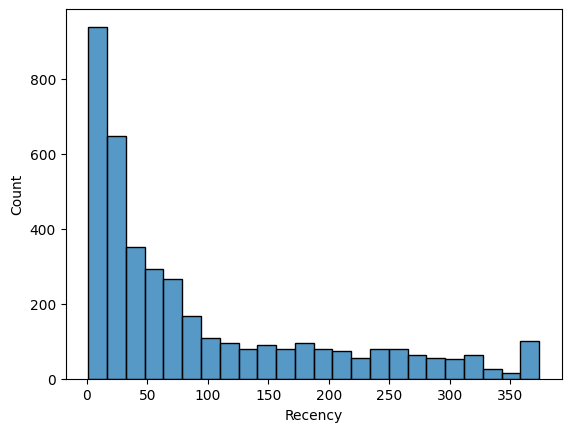

In [138]:
sns.histplot(rfm_df['Recency'])

<Axes: xlabel='Frequency', ylabel='Count'>

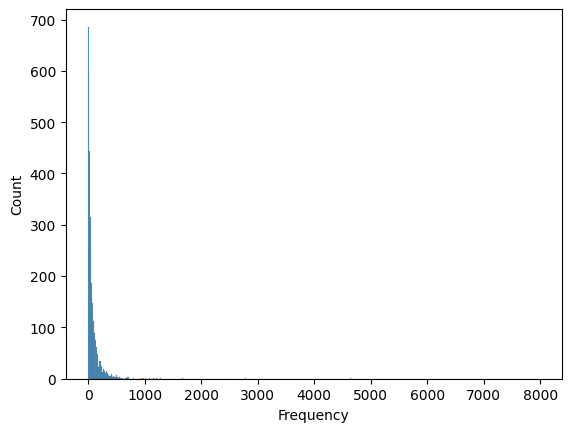

In [139]:
sns.histplot(rfm_df['Frequency'])

<Axes: xlabel='Monetary', ylabel='Count'>

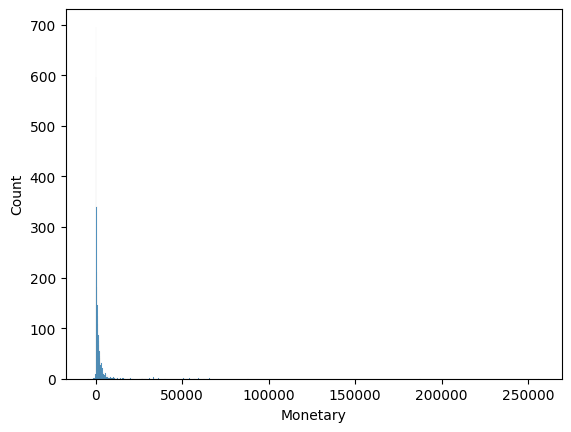

In [140]:
sns.histplot(rfm_df['Monetary'])

In [141]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_features = sc.fit_transform(rfm_df[['Recency','Frequency','Monetary']])

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #실루엣 계수

kmenas = KMeans(n_clusters= 3, random_state= 42) 
kmenas

KMeans(n_clusters=3, random_state=42)

In [143]:
labels = kmeans.fit_predict(X_features) #k-means가 학습해서 predict한 결과
labels

array([0, 1, 2, ..., 1, 1, 1], dtype=int32)

In [144]:
rfm_df['lable'] = labels
silhouette_score(X_features, labels)
#실루엣계수는 높을 수록 좋다.

np.float64(0.5855805662971346)

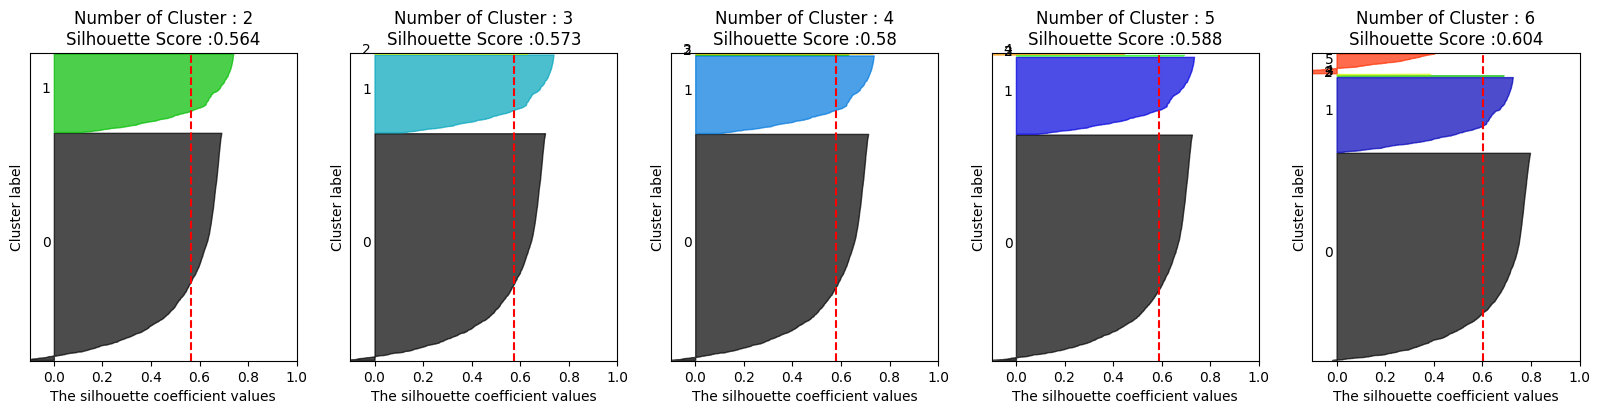

In [145]:
from kmeans_visaul import visualize_silhouette
#첫 번째 전달 인자로 클러스터 갯수, 두 번째 전달 인자로 변수를 받는다.
visualize_silhouette([2,3,4,5,6],X_features)
#2개 일 때, 실루엣 계수 평균적으로 0.6 정도인데 
# 스케일링 했음에도 불구하고 값이 너무 치우져져 있어서 좋은 형태는 아니다.추가적인 변환이 필요하다.

In [177]:
X_features

array([[ 2.33122847e+00, -4.06416842e-01, -2.61709717e-01],
       [-8.91382304e-01,  5.15467213e-02,  3.79044201e-01],
       [-9.11336551e-01,  2.06281670e+01,  4.17776063e+00],
       ...,
       [-8.41496689e-01, -3.56539622e-01, -2.34741921e-01],
       [-8.81405181e-01,  3.01243986e+00,  5.81900373e-02],
       [-4.92297379e-01, -9.80849379e-02,  1.88530936e-02]])

In [180]:
#log 스케일링 통한 추가 처리
import numpy as np

def log_transform(x):
    if x > 0:
        return np.log1p(x)
    elif x < 0:
        return -np.log1p(-x)
    else:
        return 0  # x == 0



rfm_df['Recency_log'] = rfm_df['Recency'].apply(log_transform)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(log_transform)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(log_transform)

In [181]:
X_features_2 = rfm_df[['Recency_log','Frequency_log','Monetary_log']]
sc2 = StandardScaler()
X_features_2_sc = sc2.fit_transform(X_features_2)

In [182]:
X_features_2_sc

array([[ 1.47631879, -2.0706009 , -3.9136104 ],
       [-1.83898659,  0.72177076,  1.17928715],
       [-2.36082333,  3.71317319,  2.3608805 ],
       ...,
       [-1.22847675, -0.85746958, -0.75148723],
       [-1.67099269,  2.28497623,  0.75535426],
       [-0.0337281 ,  0.42116568,  0.67529091]])

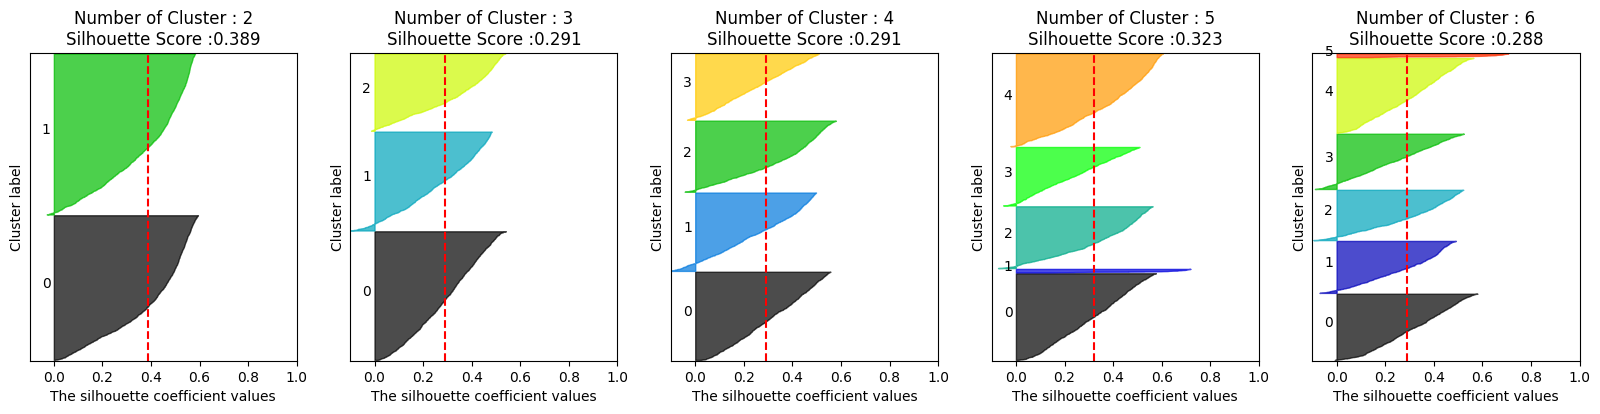

In [ ]:
visualize_silhouette([2,3,4,5,6], X_features_2_sc)
# 실루엣 계수는 아까보다 낮아졌는데 그것 만으로 평가하기 어려운 게
# cluster6 제외 로그스케일로 변환하니까 아까보다 더 균일하게 보여주는 모습.
# 뭘 선택해야 하냐? 데이터 생성한 조직이나 이러한 도메인을 가지고 있는 사람이 
# 기술통계도 보고 데이터를 확인해보면서 두개가 적절한지, 세 개가 적절한지 확인해야 하는 과정이 있다. 